In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
from plotnine import *
from extn_rw_models import *
from spont_rec_explicit import spont_rec

In [2]:
model = decay
#model = refined
#model = revised_CompAct
save_plots = True
print(model.pars)

par_vals = {'decay': [0.01, 0.2, 5],
            'refined': [0.01, 0.1, 1.5, 5.0],
            'revised_CompAct': [0.01, 1.0, 0.1, 8.0, 1.0, 5]}

            min   max  default
drate       0.0   0.5     0.25
lrate       0.0   1.0     0.20
resp_scale  0.0  10.0     1.00


In [3]:
print('spontaneous recovery \n')

ds_dict = {}
ds_dict[0] = model.simulate(spont_rec.make_trials('delay0'), par_vals[model.name])
ds_dict[50] = model.simulate(spont_rec.make_trials('delay50'), par_vals[model.name])
ds_dict[100] = model.simulate(spont_rec.make_trials('delay100'), par_vals[model.name])
ds_dict[200] = model.simulate(spont_rec.make_trials('delay200'), par_vals[model.name])
ds_dict[400] = model.simulate(spont_rec.make_trials('delay400'), par_vals[model.name])

df = pd.DataFrame({'delay': [0, 50, 100, 200, 400], 'train_response': 5*[0], 'test_response': 5*[0]})
df = df.set_index('delay', drop = True)
for k in ds_dict.keys():
    index_train = (ds_dict[k]['stage_name'] == 'pre_ex_test') & (ds_dict[k]['t_name'] == 'main')
    df.loc[k, 'train_response'] = ds_dict[k]['b'].loc[{'t': index_train}].mean().values
    index_test = (ds_dict[k]['stage_name'] == 'test') & (ds_dict[k]['t_name'] == 'main')
    df.loc[k, 'test_response'] = ds_dict[k]['b'].loc[{'t': index_test}].mean().values
df = df.reset_index()
df['test_pct'] = 100*df['test_response']/df['train_response']
print(df)

spontaneous recovery 

   delay  train_response  test_response   test_pct
0      0        0.947797       0.539786  56.951667
1     50        0.947797       0.614263  64.809605
2    100        0.947797       0.656674  69.284283
3    200        0.947797       0.695174  73.346308
4    400        0.947797       0.713303  75.259101


/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_spont_rec_b_decay.jpeg


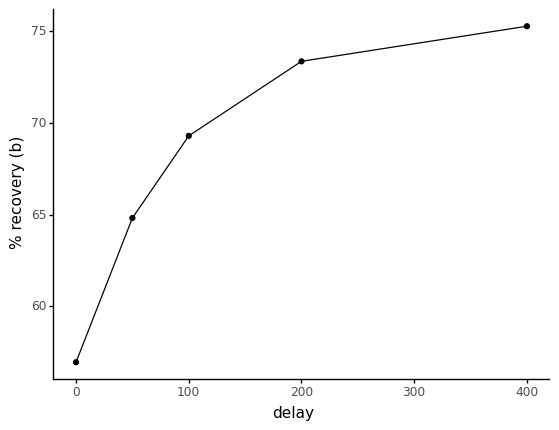

In [4]:
# Note that recovery can never truly reach 100%, because the CS -> US association
# has decreased at least a little.
plot_b = (ggplot(df, aes(x = 'delay', y = 'test_pct')) + geom_line() + geom_point())
plot_b += ylab('% recovery (b)')
plot_b += theme_classic()
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/rw_spont_rec_b_' + model.name + '.jpeg', dpi = 500)

/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scales.py:29: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 5 x 4 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_spont_rec_w_decay.jpeg


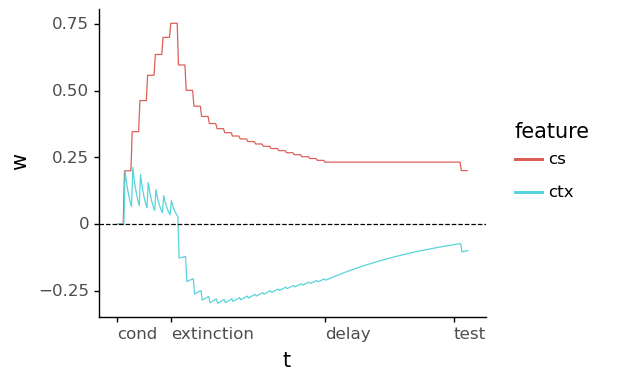

In [5]:
plot_w = sr.learn_plot(ds_dict[100],
                       var = 'w',
                       rename_coords = {'f_name': 'feature'},
                       sel = {'f_name': ['cs', 'ctx']},
                       figure_size = (5, 4))
plot_w += geom_hline(yintercept = 0, linetype = "dashed")
plot_w += theme(axis_text_x=element_text(ha = 'left'))
plot_w += scale_x_continuous(breaks = [0, 42, 162, 262], labels = ['cond', 'extinction', 'delay', 'test'])
plot_w.draw()
if save_plots:
    plot_w.save(filename = 'plots/rw_spont_rec_w_' + model.name + '.jpeg', dpi = 300)